# **Weld Inspection using Image Processing**

# **Import Libraries**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter

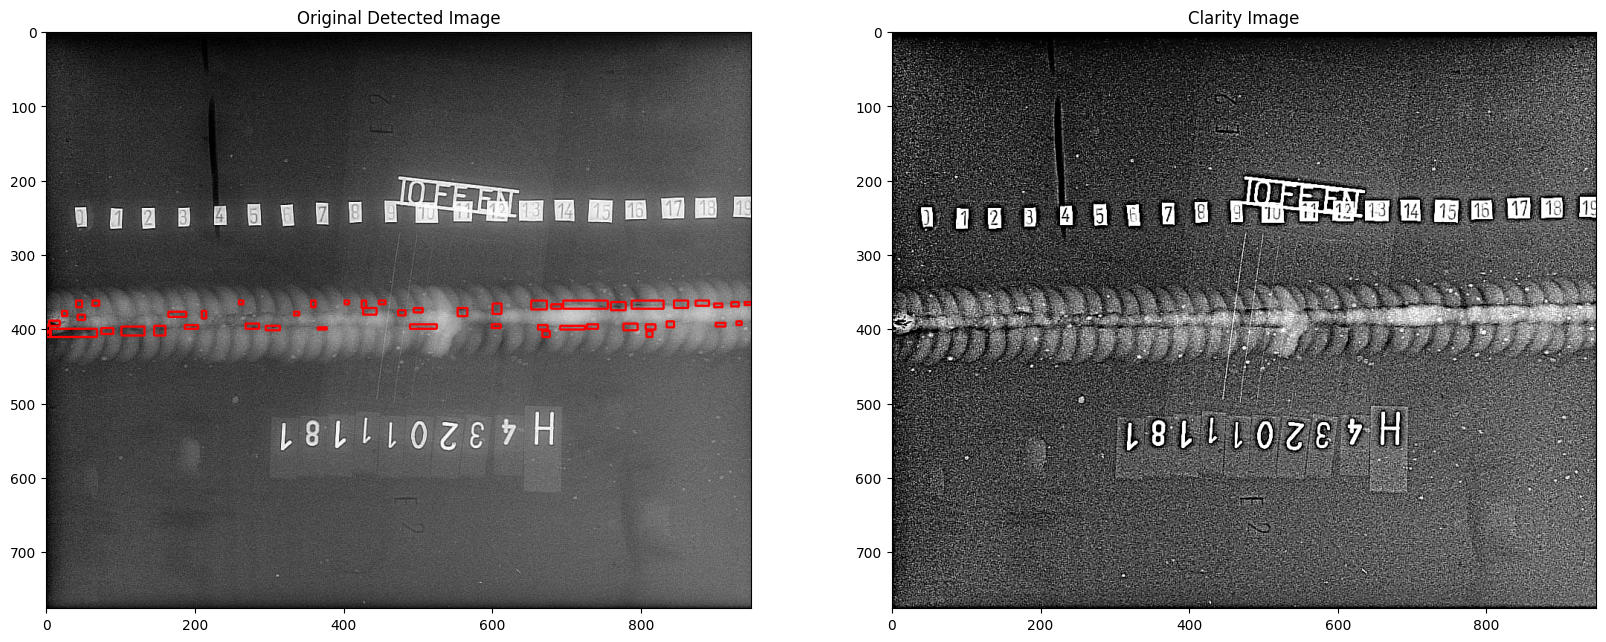

In [ ]:
# Load an image from file
weld_img = cv2.imread('weld.JPG')
train_weld = weld_img.copy()

# Enhance the image using Unsharp Mask filter
enhanced_image = Image.fromarray(train_weld)
enhanced_image = enhanced_image.filter(ImageFilter.UnsharpMask(radius=4, percent=400, threshold=4))
train_weld = np.array(enhanced_image)

# Crop a region of interest (ROI)
roi = train_weld[362:411]

# Convert the ROI to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Add adaptive Threshold within the ROI
thresh_roi = cv2.adaptiveThreshold(gray_roi, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 55, 8)

# Apply morphological operations (Erosion) within the ROI
kernel = np.ones((2, 3), np.uint8)
eroded_mask_roi = cv2.erode(thresh_roi, kernel, iterations=1)

# Find Contours within the extracted ROI
cnts_roi, _ = cv2.findContours(eroded_mask_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected damages within the ROI on the original image
for cnt_roi in cnts_roi:
    area = cv2.contourArea(cnt_roi)
    if 9 < area < 1000:  # Adjust the size threshold as needed
        x_roi, y_roi, w_roi, h_roi = cv2.boundingRect(cnt_roi)
        # Draw rectangles on the original image, not on the cropped ROI
        cv2.rectangle(weld_img, (x_roi, y_roi + 362), (x_roi + w_roi, y_roi + h_roi + 362), (0, 0, 255), 2)

# Display the result using matplotlib subplot
plt.figure(figsize=(20, 15))

# Plot using subplot
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(weld_img, cv2.COLOR_BGR2RGB))
plt.title('Original Detected Image')

# Plot clarity image
plt.subplot(1, 2, 2)
plt.imshow(train_weld, cmap='gray')
plt.title('Clarity Image')

plt.show()


array([[[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]],

       [[ 10,  10,  10],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [  9,   9,   9],
        [  8,   8,   8],
        [  9,   9,   9]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  1,   1,   1],
        [  7,   7,   7],
        [  3,   3,   3],
        ...,
        [ 68,  68,  68],
        [ 66,  66,  66],
        [ 61,  61,  61]],

       [[  0,   0,   0],
        [  2,   2,   2],
        [  0,   0,   0],
        ...,
        [ 48,  48,  48],
        [ 50,  50,  50],
        [ 48,  48,  48]],

       [[  0,   0,   0],
        [  3,   3,   3],
        [  0,   0,   0],
        ...,
        [ 32,  32,  32],
        [ 37,  37,  37],
        [ 38,  38,  38]]], dtype=uint8)
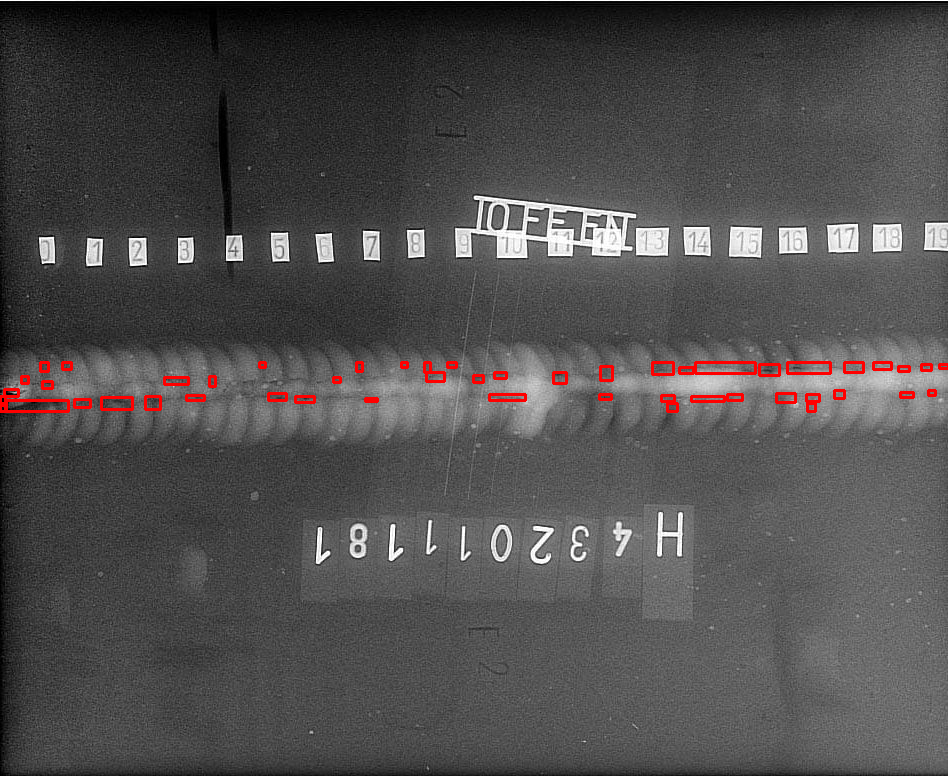

In [ ]:
weld_img_rgb = cv2.cvtColor(weld_img, cv2.COLOR_BGR2RGB)
display(weld_img_rgb)

# Comment

## 1. **Increasing image quality with Unsharp Mask:**
    - The original image is enhanced using the Unsharp Mask filter and saved in `train_weld`.

## 2. **Cutting a region (ROI):**
    - A specific area of the image called ``roi'' is cut.

## 3. **Application of Adaptive Threshold inside ROI:**
    - The Adaptive Thresholding method is used to convert the gray image into a binary image (`thresh_roi').

## 4. **Morphological operation (Erosion) inside the ROI:**
    - Using the Erosion operation, the unstable regions of the binary image are reduced (`eroded_mask_roi`).

## 5. **Finding Contours inside the ROI:**
    - Using the function `findContours`, contours are extracted in the created binary image inside the ROI (`cnts_roi`).

## 6. **Diagnosis and marking of damages in the original image:**
    - Based on Contours area, size-appropriate damages are detected and marked in red in the original image.

# heatmap

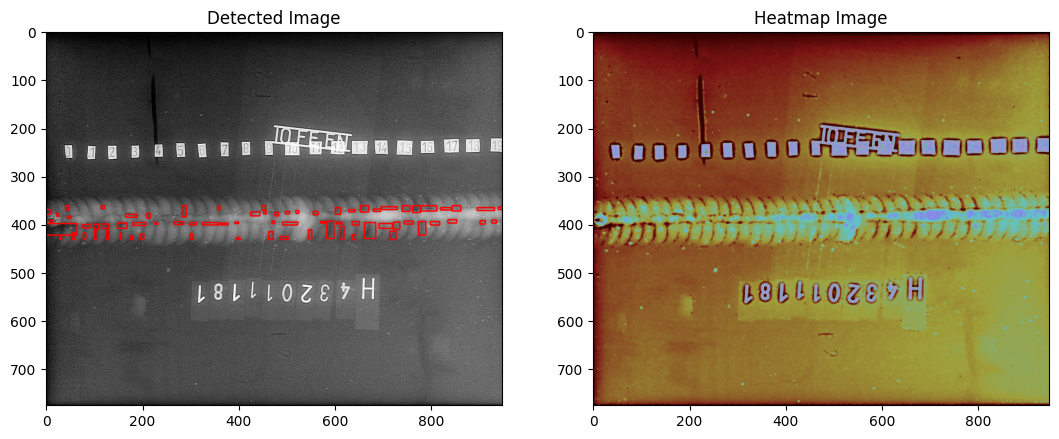

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Load an image from file
weld_img = cv2.imread('weld.JPG')
processed_image = weld_img.copy()

# Apply Gaussian Blur for Noise Reduction
processed_image = cv2.GaussianBlur(processed_image, (9, 9), 0)

# Enhance the image using Unsharp Mask filter
enhanced_image = Image.fromarray(processed_image)
enhanced_image = enhanced_image.filter(ImageFilter.UnsharpMask(radius=4, percent=400, threshold=4))
processed_image = np.array(enhanced_image)

# Plot heatmap overlay on the whole image
heatmap_weld = cv2.applyColorMap(processed_image, cv2.COLORMAP_JET)
heatmap_weld = cv2.addWeighted(processed_image, 0.6, heatmap_weld, 0.4, 0)
processed_image = heatmap_weld

# Crop a region of interest (ROI)
roi = processed_image[360:430]

# Convert the ROI to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Add adaptive Threshold within the ROI
thresh_roi = cv2.adaptiveThreshold(gray_roi, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 57, 8)

# Apply morphological operations (Erosion) within the ROI
kernel = np.ones((3, 4), np.uint8)
eroded_mask_roi = cv2.erode(thresh_roi, kernel, iterations=1)

# Find Contours within the extracted ROI
cnts_roi, _ = cv2.findContours(eroded_mask_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected damages on the heatmap overlay
for cnt_roi in cnts_roi:
    area = cv2.contourArea(cnt_roi)
    if 9 < area < 1000:  # Adjust the size threshold as needed
        x_roi, y_roi, w_roi, h_roi = cv2.boundingRect(cnt_roi)
        # Draw rectangles on the heatmap overlay
        cv2.rectangle(weld_img, (x_roi, y_roi + 362), (x_roi + w_roi, y_roi + h_roi + 362), (0, 0, 255), 2)

# Display the result using matplotlib subplot
plt.figure(figsize=(20, 15))

# Plot using subplot
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(weld_img, cv2.COLOR_BGR2RGB))
plt.title('Detected Image')

# Plot clarity image
plt.subplot(1, 3, 3)
plt.imshow(heatmap_weld, cmap='gray')
plt.title('Heatmap Image')

plt.show()


array([[[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]],

       [[ 10,  10,  10],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [  9,   9,   9],
        [  8,   8,   8],
        [  9,   9,   9]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  1,   1,   1],
        [  7,   7,   7],
        [  3,   3,   3],
        ...,
        [ 68,  68,  68],
        [ 66,  66,  66],
        [ 61,  61,  61]],

       [[  0,   0,   0],
        [  2,   2,   2],
        [  0,   0,   0],
        ...,
        [ 48,  48,  48],
        [ 50,  50,  50],
        [ 48,  48,  48]],

       [[  0,   0,   0],
        [  3,   3,   3],
        [  0,   0,   0],
        ...,
        [ 32,  32,  32],
        [ 37,  37,  37],
        [ 38,  38,  38]]], dtype=uint8)
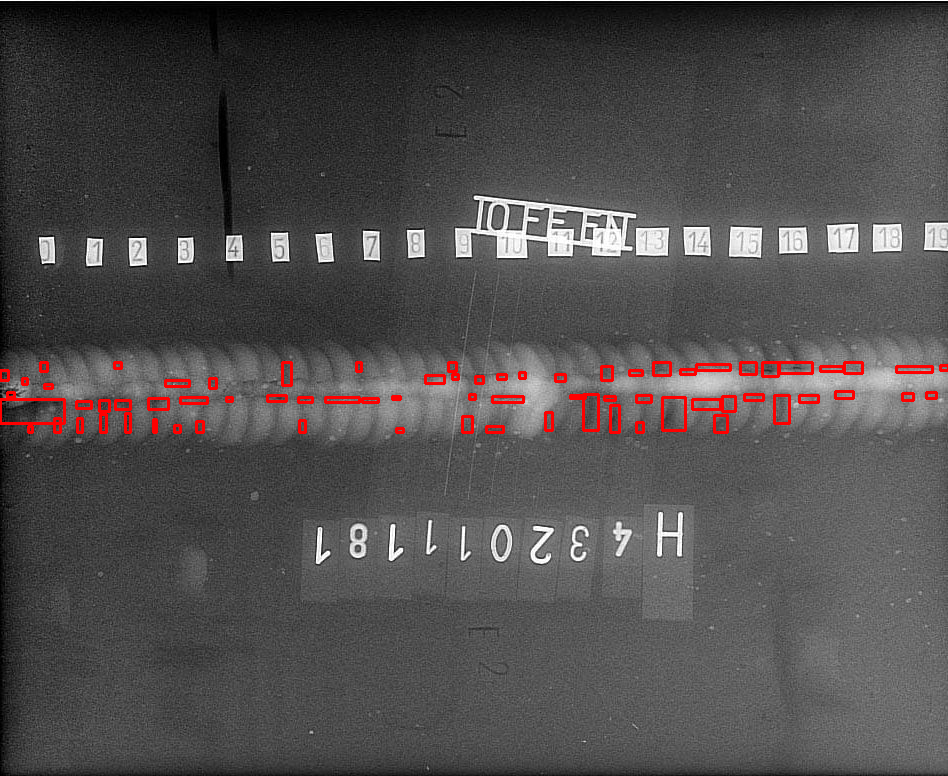

In [ ]:
weld_img_rgb = cv2.cvtColor(weld_img, cv2.COLOR_BGR2RGB)
display(weld_img_rgb)

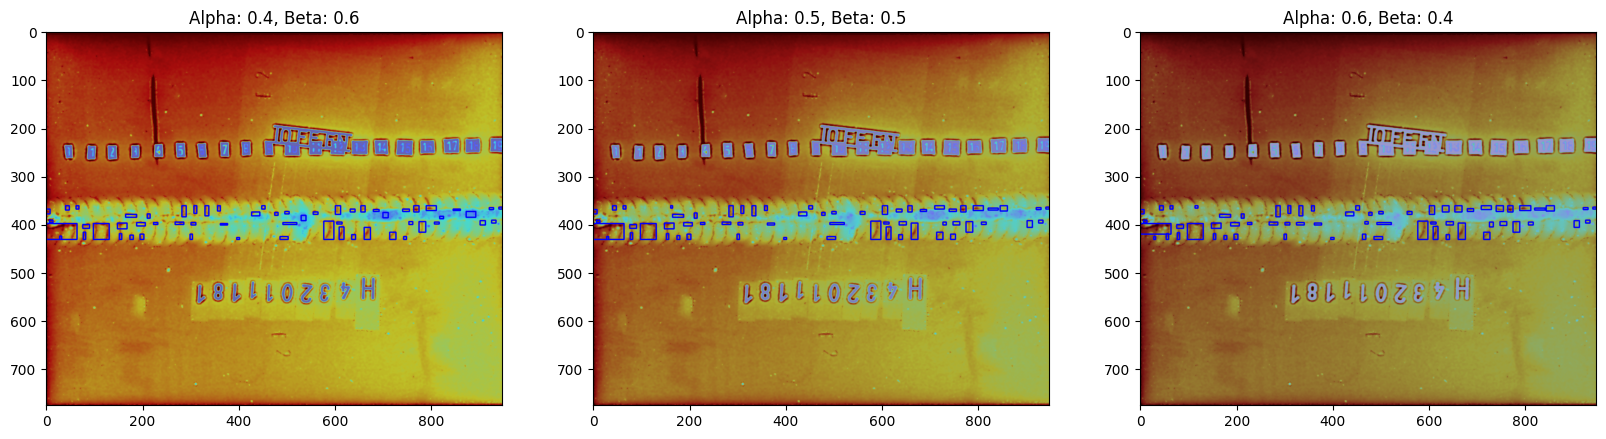

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter


# Initialize different alpha and beta values
alpha_values = [0.4, 0.5, 0.6]
beta_values = [0.6, 0.5, 0.4]

# Plot heatmap overlay on the whole image with different alpha and beta values
plt.figure(figsize=(20, 15))

for i in range(3):
    # Load an image from file
    weld_img = cv2.imread('weld.JPG')
    processed_image = weld_img.copy()

    # Apply Gaussian Blur for Noise Reduction
    processed_image = cv2.GaussianBlur(processed_image, (9, 9), 0)

    # Enhance the image using Unsharp Mask filter
    enhanced_image = Image.fromarray(processed_image)
    enhanced_image = enhanced_image.filter(ImageFilter.UnsharpMask(radius=3, percent=300, threshold=3))
    processed_image = np.array(enhanced_image)

    # Plot using subplot
    plt.subplot(1, 3, i + 1)

    # Adjust alpha and beta for each iteration
    alpha = alpha_values[i]
    beta = beta_values[i]

    # Create heatmap overlay
    heatmap_weld = cv2.applyColorMap(processed_image, cv2.COLORMAP_JET)
    heatmap_weld = cv2.addWeighted(processed_image, alpha, heatmap_weld, beta, 0)
    processed_image = heatmap_weld
    # Crop a region of interest (ROI)
    roi = processed_image[360:430]

    # Convert the ROI to grayscale
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Add adaptive Threshold within the ROI
    thresh_roi = cv2.adaptiveThreshold(gray_roi, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 55, 8)

    # Apply morphological operations (Erosion) within the ROI
    kernel = np.ones((3, 4), np.uint8)
    eroded_mask_roi = cv2.erode(thresh_roi, kernel, iterations=1)

    # Find Contours within the extracted ROI
    cnts_roi, _ = cv2.findContours(eroded_mask_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around detected damages on the heatmap overlay
    for cnt_roi in cnts_roi:
        area = cv2.contourArea(cnt_roi)
        if 9 < area < 1000:  # Adjust the size threshold as needed
            x_roi, y_roi, w_roi, h_roi = cv2.boundingRect(cnt_roi)
            # Draw rectangles on the heatmap overlay
            cv2.rectangle(heatmap_weld, (x_roi, y_roi + 362), (x_roi + w_roi, y_roi + h_roi + 362), (0, 0, 255), 2)

    plt.imshow(heatmap_weld, cmap='gray')
    plt.title(f'Alpha: {alpha}, Beta: {beta}')




plt.show()
